In [1]:
import pandas as pd
import numpy as np

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly = pd.DataFrame() 
    # and set poly_sframe['power_1'] equal to the passed feature
    poly['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly[name] = feature**power
    return poly

In [4]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [5]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [6]:
poly1_data

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0
...,...,...
8092,9640.0,4668000.0
9254,9890.0,6885000.0
3914,10040.0,7062500.0
7252,12050.0,7700000.0


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
linreg =  LinearRegression()
x =  poly1_data['power_1'].values
x = x.reshape(-1,1)
y = poly1_data['price'].values
model1 =  linreg.fit(x,y)

In [9]:
#let's take a look at the weights before we plot
print('model 1:','Coefficients: \n', model1.coef_)
# The intercept of model1
print('model 1:','intercept: \n', model1.intercept_)

model 1: Coefficients: 
 [280.6235679]
model 1: intercept: 
 -43580.74309447396


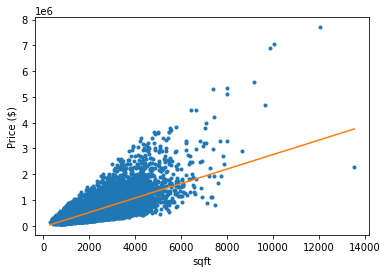

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.xlabel('sqft')
plt.ylabel('Price ($)')
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data['power_1'].values.reshape((-1,1))),'-')

### Second degree 

In [11]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']
my_features =  poly2_data.columns.values.tolist()

In [12]:
model2 = linreg.fit(poly2_data[my_features].values,poly2_data['price'])

In [13]:
print('model 2:','Coefficients: \n', model2.coef_)
# The intercept of model1
print('model 2:','intercept: \n', model2.intercept_)

model 2: Coefficients: 
 [-2.58528073e-13  1.38391336e-16  1.00000000e+00]
model 2: intercept: 
 1.1641532182693481e-10


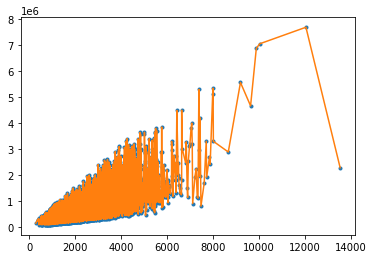

In [15]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'],model2.predict(poly2_data[my_features].values),'-')

### 15 degree 

In [16]:
poly15_data = polynomial_sframe(sales['sqft_living'],15)
poly15_data['price'] = sales['price']

In [17]:
my_features = poly15_data.columns.values.tolist()
model15 = linreg.fit(poly15_data[my_features].values,poly15_data['price'])

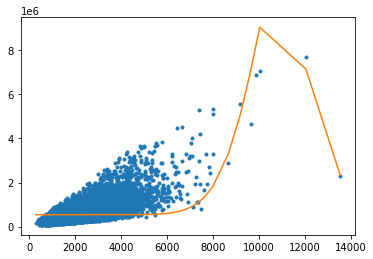

In [18]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'],model15.predict(poly15_data[my_features].values),'-')

In [19]:
d1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
d2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
d3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
d4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

model 15 of set 1: Coefficients: 
 [ 5.58916287e-06 -2.21242892e-09  3.07276907e-13 -1.28698777e-17
  2.67776529e-22  8.01649871e-24  5.33311640e-24 -1.17785647e-24
 -5.83545175e-25  2.77770873e-24  9.30428974e-24 -4.35099892e-24
  2.42260474e-24  4.85542561e-25  3.58317895e-24  1.00000000e+00]
model 15 of set 1: intercept: 
 -0.004222064162604511


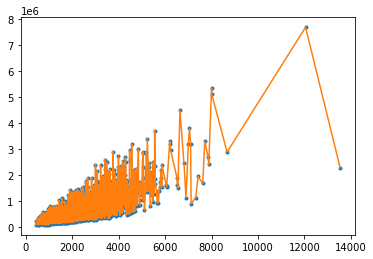

In [20]:
d1_poly = polynomial_sframe(d1['sqft_living'],15)
d1_poly['price'] = d1['price'] 
d1_feature = d1_poly.columns.values.tolist()
d1_model = linreg.fit(d1_poly[d1_feature].values,d1_poly['price'])
print('model 15 of set 1:','Coefficients: \n', d1_model.coef_)
print('model 15 of set 1:','intercept: \n', d1_model.intercept_)

plt.plot(d1_poly['power_1'],d1_poly['price'],'.',
        d1_poly['power_1'],model15.predict(d1_poly[d1_feature].values),'-')

model 15 of set 1: Coefficients: 
 [-9.78648064e-06  4.80075260e-09 -9.01916759e-13  5.47823128e-17
  2.44955166e-22  2.35720548e-24 -1.27109586e-24  5.09675951e-25
 -4.29726206e-25  2.18785686e-24 -1.24147190e-23  2.00176061e-24
 -1.76574715e-25  3.16154651e-24  1.03268960e-25  1.00000000e+00]
model 15 of set 1: intercept: 
 0.006384045933373272


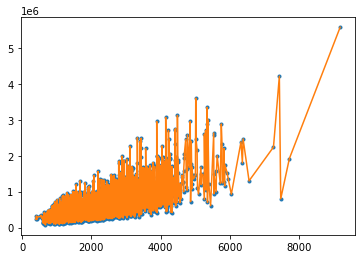

In [21]:
d2_poly = polynomial_sframe(d2['sqft_living'],15)
d2_poly['price'] = d2['price'] 
d2_feature = d2_poly.columns.values.tolist()
d2_model = linreg.fit(d2_poly[d2_feature].values,d2_poly['price'])
print('model 15 of set 1:','Coefficients: \n', d2_model.coef_)
print('model 15 of set 1:','intercept: \n', d2_model.intercept_)

plt.plot(d2_poly['power_1'],d2_poly['price'],'.',
        d2_poly['power_1'],model15.predict(d2_poly[d2_feature].values),'-')

model 15 of set 1: Coefficients: 
 [-1.01700784e-05  4.59996544e-09 -7.70795743e-13  4.10363324e-17
 -1.38637835e-22 -4.49342263e-24 -4.37944101e-24  2.48742110e-24
  9.42653181e-26 -1.62013059e-24 -1.33519140e-23  1.82716666e-24
  1.75223822e-24 -7.29323954e-27 -3.36168689e-24  1.00000000e+00]
model 15 of set 1: intercept: 
 0.007034946349449456


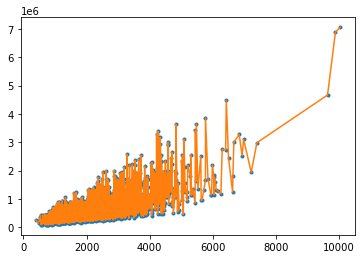

In [22]:
d3_poly = polynomial_sframe(d3['sqft_living'],15)
d3_poly['price'] = d3['price'] 
d3_feature = d3_poly.columns.values.tolist()
d3_model = linreg.fit(d3_poly[d3_feature].values,d3_poly['price'])
print('model 15 of set 1:','Coefficients: \n', d3_model.coef_)
print('model 15 of set 1:','intercept: \n', d3_model.intercept_)

plt.plot(d3_poly['power_1'],d3_poly['price'],'.',
        d3_poly['power_1'],model15.predict(d3_poly[d3_feature].values),'-')

model 15 of set 1: Coefficients: 
 [-9.47392282e-07  5.06165534e-10 -1.05423574e-13  7.20302704e-18
  3.13538260e-23  7.06594408e-24  2.48490323e-24 -3.40523725e-24
  5.11079999e-24  5.47235315e-24 -1.16059778e-23 -7.13732101e-24
 -8.04102363e-25  5.22493612e-24 -1.02020559e-23  1.00000000e+00]
model 15 of set 1: intercept: 
 0.000569168827496469


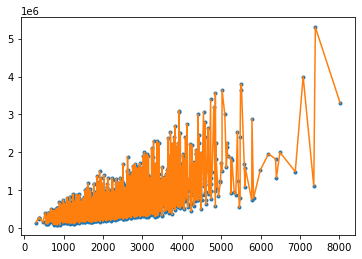

In [23]:
d4_poly = polynomial_sframe(d4['sqft_living'],15)
d4_poly['price'] = d4['price'] 
d4_feature = d4_poly.columns.values.tolist()
d4_model = linreg.fit(d4_poly[d4_feature].values,d4_poly['price'])
print('model 15 of set 1:','Coefficients: \n', d4_model.coef_)
print('model 15 of set 1:','intercept: \n', d4_model.intercept_)

plt.plot(d4_poly['power_1'],d4_poly['price'],'.',
        d4_poly['power_1'],model15.predict(d4_poly[d4_feature].values),'-')

In [52]:
test_sales = pd.read_csv('wk3_kc_house_test_data.csv')
train_sales = pd.read_csv('wk3_kc_house_train_data.csv')
valid_sales = pd.read_csv('wk3_kc_house_valid_data.csv')

test_sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [64]:
def get_residual_sum_of_square(model,data,output):
    prediction = model.predict(data)
    residuals = output - prediction
    RSS = np.sum(np.square(residuals))
    return RSS

In [65]:
import turicreate

In [66]:

rssDic = {}
rssDictest = {}
modelDic = {}
for i in range(1,15+1):
    poly_train_data  = polynomial_sframe(train_sales['sqft_living'], i)

    poly_features = poly_train_data.columns.values.tolist() # get the name of the features

    modelDic[i] = linreg.fit(poly_train_data[poly_features].values.reshape((-1,i)), train_sales['price'])
    
    poly_valid_data = polynomial_sframe(valid_sales['sqft_living'], i)

    
    poly_test_data = polynomial_sframe(test_sales['sqft_living'], i)
    predictions = modelDic[i].predict(poly_valid_data[poly_features])
 
    rssDic[i] = get_residual_sum_of_square(modelDic[i], poly_valid_data, valid_sales['price'])
    rssDictest[i] = get_residual_sum_of_square(modelDic[i], poly_test_data, test_sales['price'])

print('rss of each model on validation data:',rssDic)
print('rss of each model on test data:',rssDictest)

rss of each model on validation data: {1: 629097886299585.8, 2: 623955062706518.0, 3: 625820280251531.0, 4: 629987341468500.4, 5: 623373644830481.8, 6: 623248623641342.0, 7: 623170277145830.6, 8: 623371883707585.0, 9: 623300719513891.0, 10: 623430182085440.4, 11: 623552071862743.2, 12: 623340349900493.2, 13: 623264348723454.8, 14: 623235829390757.4, 15: 623312318244071.2}
rss of each model on test data: {1: 142347931358638.7, 2: 135542039274080.42, 3: 135585996079050.44, 4: 135382681503682.48, 5: 136772700176818.64, 6: 136766797835253.6, 7: 136758855060200.06, 8: 136784771585941.38, 9: 136768695901912.55, 10: 136764725110279.02, 11: 136767006244991.0, 12: 136740283841371.08, 13: 136820083291517.5, 14: 136986402985046.5, 15: 137014883701729.28}
